In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

In [ ]:
Data = pd.read_excel('Composite Dep Data(1).xlsx', sheet_name = 'Warmhumid')
Data.head()

,S.No.,Date and time,Radiative intensity,T_air,RH_air,DOAS VC chiller supplied cooling energy,Radiant VA chiller supplied cooling energy,Heating energy by gas boiler,Heating energy by solar collector,Heating energy by auxiliary heater,Cooling Energy,Heating Energy
0,1,2023-01-02 09:00:00,269.9375,24.8000,90.500,193189.0,14366.48,46680.6,-22115.20,64837.04,207555.48,89402.44
1,2,2023-01-02 10:00:00,451.0000,26.4000,82.750,208709.9,34892.06,0.0,71372.86,18735.79,243601.96,90108.65
2,3,2023-01-02 11:00:00,257.5000,27.7500,72.750,204338.6,30993.46,0.0,79076.78,10746.26,235332.06,89823.04
3,4,2023-01-02 12:00:00,241.8750,28.5125,64.000,189399.4,21920.07,0.0,101663.50,-12261.10,211319.47,89402.40
4,5,2023-01-02 13:00:00,179.9375,28.6375,59.125,106161.8,29668.82,0.0,80126.27,9276.15,135830.62,89402.42


In [ ]:
# Assuming 'datetime_column' is your datetime column
Data['Timestamp'] = pd.to_datetime(Data['Date and time']).dt.hour
Data['Year'] = pd.to_datetime(Data['Date and time']).dt.year
Data['Month'] = pd.to_datetime(Data['Date and time']).dt.month
Data['Day'] = pd.to_datetime(Data['Date and time']).dt.day

Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 16 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   S.No.                                       2600 non-null   int64         
 1   Date and time                               2600 non-null   datetime64[ns]
 2   Radiative intensity                         2600 non-null   float64       
 3   T_air                                       2600 non-null   float64       
 4   RH_air                                      2600 non-null   float64       
 5   DOAS VC chiller supplied cooling energy     2600 non-null   float64       
 6   Radiant VA chiller supplied cooling energy  2600 non-null   float64       
 7   Heating energy by gas boiler                2600 non-null   float64       
 8   Heating energy by solar collector           2600 non-null   float64       
 9   Heating 

In [ ]:
Data = Data.drop(['Date and time'], axis = 1)
# Data = Data[Data['Heating energy by auxiliary heater']>0]
Data

,S.No.,Radiative intensity,T_air,RH_air,DOAS VC chiller supplied cooling energy,Radiant VA chiller supplied cooling energy,Heating energy by gas boiler,Heating energy by solar collector,Heating energy by auxiliary heater,Cooling Energy,Heating Energy,Timestamp,Year,Month,Day
0,1,269.9375,24.8000,90.500,193189.00,14366.480,46680.60,-22115.20,64837.040,207555.480,89402.440,9,2023,1,2
1,2,451.0000,26.4000,82.750,208709.90,34892.060,0.00,71372.86,18735.790,243601.960,90108.650,10,2023,1,2
2,3,257.5000,27.7500,72.750,204338.60,30993.460,0.00,79076.78,10746.260,235332.060,89823.040,11,2023,1,2
3,4,241.8750,28.5125,64.000,189399.40,21920.070,0.00,101663.50,-12261.100,211319.470,89402.400,12,2023,1,2
4,5,179.9375,28.6375,59.125,106161.80,29668.820,0.00,80126.27,9276.150,135830.620,89402.420,13,2023,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,2596,228.1875,28.5875,59.250,175259.40,27588.770,0.00,87765.03,4465.102,202848.170,92230.132,14,2023,12,29
2596,2597,130.8750,27.9625,61.875,172859.10,17531.660,11190.61,27514.84,50696.970,190390.760,89402.420,15,2023,12,29
2597,2598,50.9375,27.2625,65.500,171863.10,5750.690,95844.07,-37486.20,31044.520,177613.790,89402.390,16,2023,12,29
2598,2599,103.1875,26.6250,70.125,174849.90,3321.207,117616.60,-51861.10,23646.920,178171.107,89402.420,17,2023,12,29


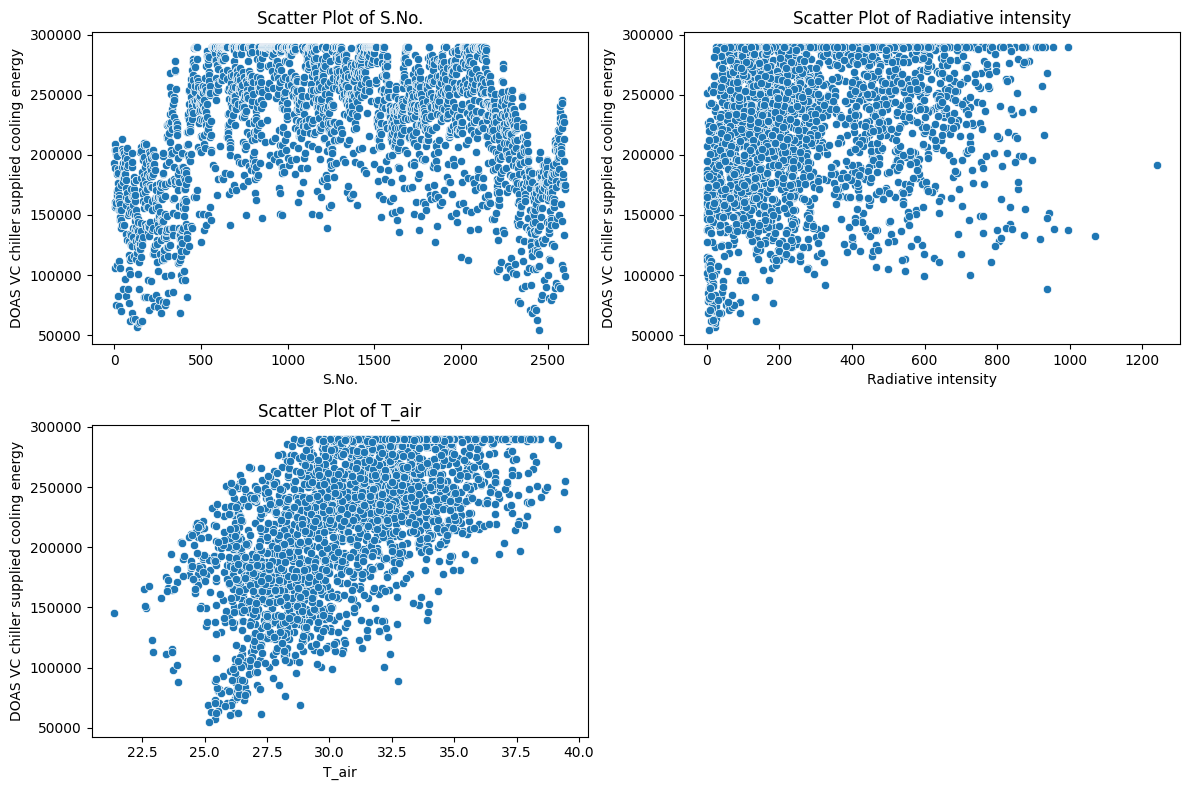

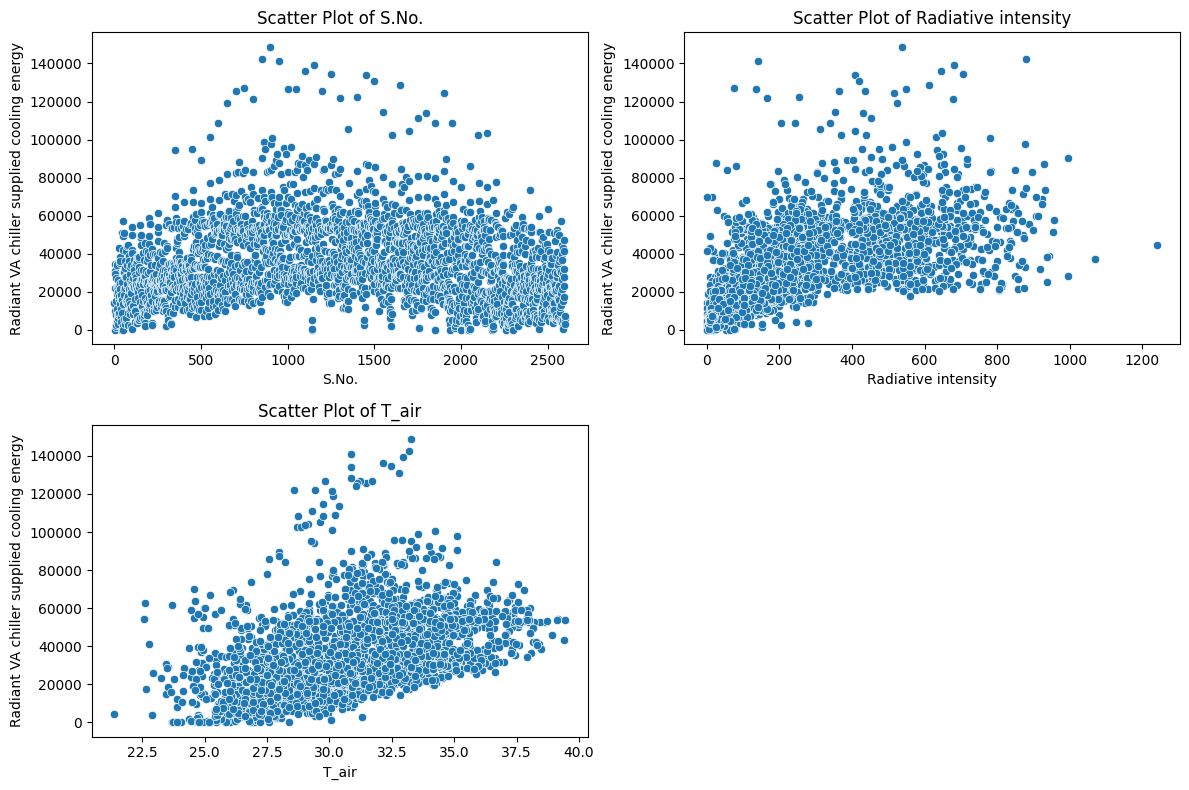

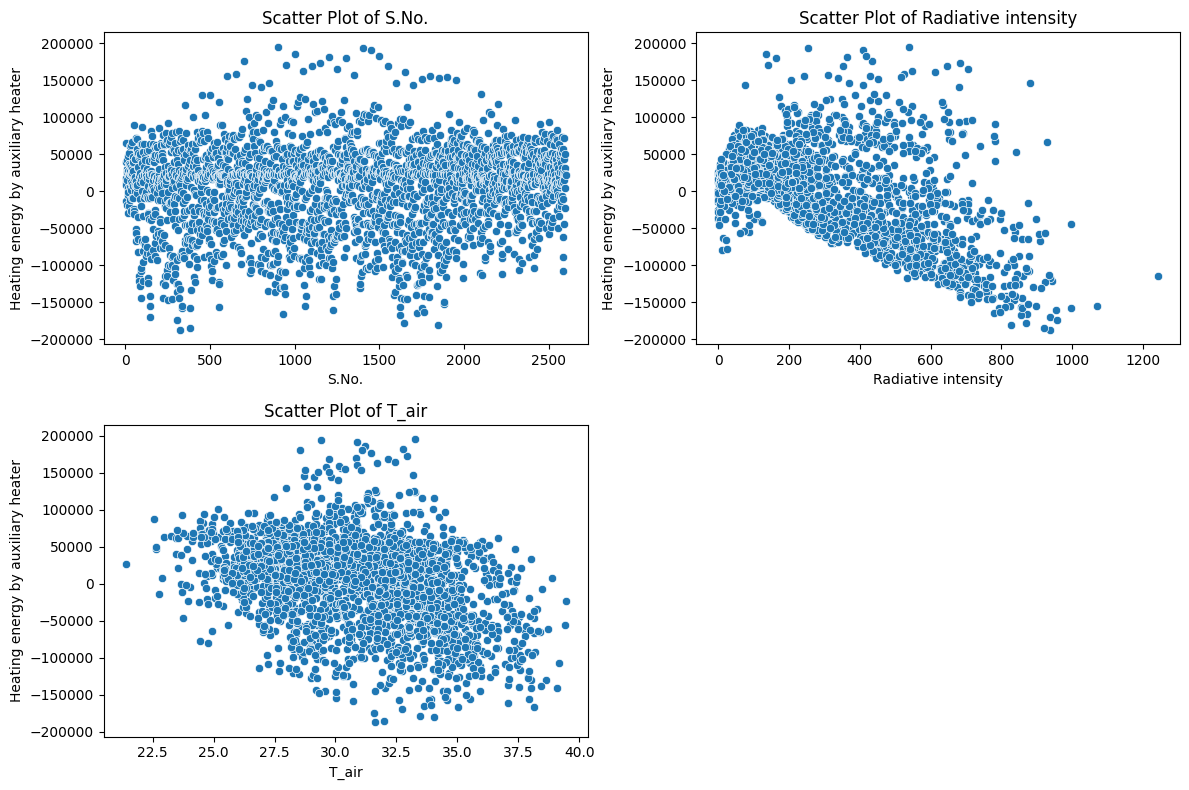

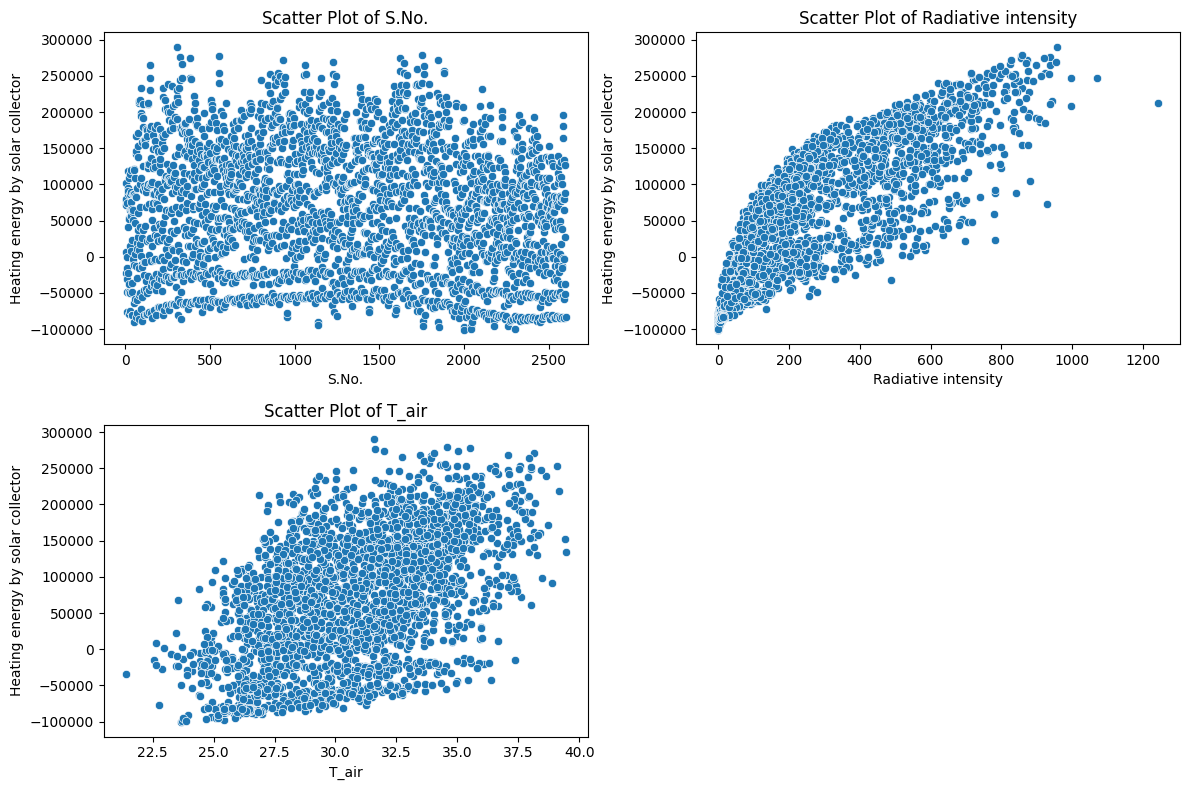

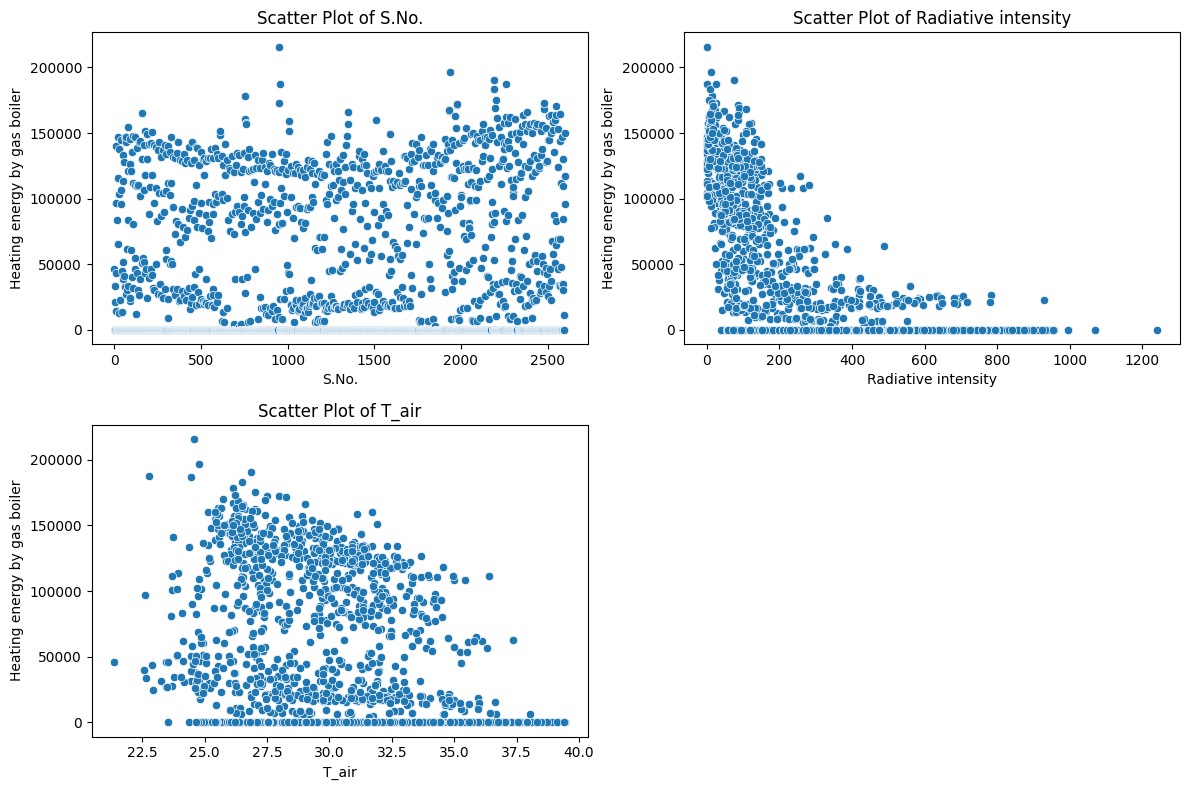

In [ ]:
# Plot scatter plots for each feature
plt.figure(figsize=(12, 8))

for i, feature in enumerate(Data.columns[0:3]):
    plt.subplot(2, 2, i + 1)

    # Scatter Plot
    sns.scatterplot(x=feature, y='DOAS VC chiller supplied cooling energy', data=Data)
    plt.title(f'Scatter Plot of {feature}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
for i, feature in enumerate(Data.columns[0:3]):
    plt.subplot(2, 2, i + 1)

    # Scatter Plot
    sns.scatterplot(x=feature, y='Radiant VA chiller supplied cooling energy', data=Data)
    plt.title(f'Scatter Plot of {feature}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
for i, feature in enumerate(Data.columns[0:3]):
    plt.subplot(2, 2, i + 1)

    # Scatter Plot
    sns.scatterplot(x=feature, y='Heating energy by auxiliary heater', data=Data)
    plt.title(f'Scatter Plot of {feature}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
for i, feature in enumerate(Data.columns[0:3]):
    plt.subplot(2, 2, i + 1)

    # Scatter Plot
    sns.scatterplot(x=feature, y='Heating energy by solar collector', data=Data)
    plt.title(f'Scatter Plot of {feature}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
for i, feature in enumerate(Data.columns[0:3]):
    plt.subplot(2, 2, i + 1)

    # Scatter Plot
    sns.scatterplot(x=feature, y='Heating energy by gas boiler', data=Data)
    plt.title(f'Scatter Plot of {feature}')

plt.tight_layout()
plt.show()

In [ ]:
Data['Heating Energy'] = Data['Heating energy by auxiliary heater'] + Data['Heating energy by solar collector'] + Data['Heating energy by gas boiler'] + 9999
Data['Cooling Energy'] = Data['DOAS VC chiller supplied cooling energy'] + Data['Radiant VA chiller supplied cooling energy']


In [ ]:
Data

,S.No.,Radiative intensity,T_air,RH_air,DOAS VC chiller supplied cooling energy,Radiant VA chiller supplied cooling energy,Heating energy by gas boiler,Heating energy by solar collector,Heating energy by auxiliary heater,Cooling Energy,Heating Energy,Timestamp,Year,Month,Day
0,1,269.9375,24.8000,90.500,193189.00,14366.480,46680.60,-22115.20,64837.040,207555.480,99401.440,9,2023,1,2
1,2,451.0000,26.4000,82.750,208709.90,34892.060,0.00,71372.86,18735.790,243601.960,100107.650,10,2023,1,2
2,3,257.5000,27.7500,72.750,204338.60,30993.460,0.00,79076.78,10746.260,235332.060,99822.040,11,2023,1,2
3,4,241.8750,28.5125,64.000,189399.40,21920.070,0.00,101663.50,-12261.100,211319.470,99401.400,12,2023,1,2
4,5,179.9375,28.6375,59.125,106161.80,29668.820,0.00,80126.27,9276.150,135830.620,99401.420,13,2023,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,2596,228.1875,28.5875,59.250,175259.40,27588.770,0.00,87765.03,4465.102,202848.170,102229.132,14,2023,12,29
2596,2597,130.8750,27.9625,61.875,172859.10,17531.660,11190.61,27514.84,50696.970,190390.760,99401.420,15,2023,12,29
2597,2598,50.9375,27.2625,65.500,171863.10,5750.690,95844.07,-37486.20,31044.520,177613.790,99401.390,16,2023,12,29
2598,2599,103.1875,26.6250,70.125,174849.90,3321.207,117616.60,-51861.10,23646.920,178171.107,99401.420,17,2023,12,29


In [ ]:
# Data = Data.drop(['DOAS VC chiller supplied cooling energy'] , axis = 1)
# Data = Data.drop(['Radiant VA chiller supplied cooling energy'] , axis = 1)
# Data = Data.drop(['Heating energy by gas boiler'], axis = 1)
# Data = Data.drop(['Heating energy by solar collector'] , axis = 1)
# Data = Data.drop(['Heating energy by auxiliary heater'], axis = 1)

# Data = Data.drop(['Output 1 (Cooling capacity)'], axis = 1)
# Data = Data.drop(['Output 2 (Heating load)'], axis = 1)

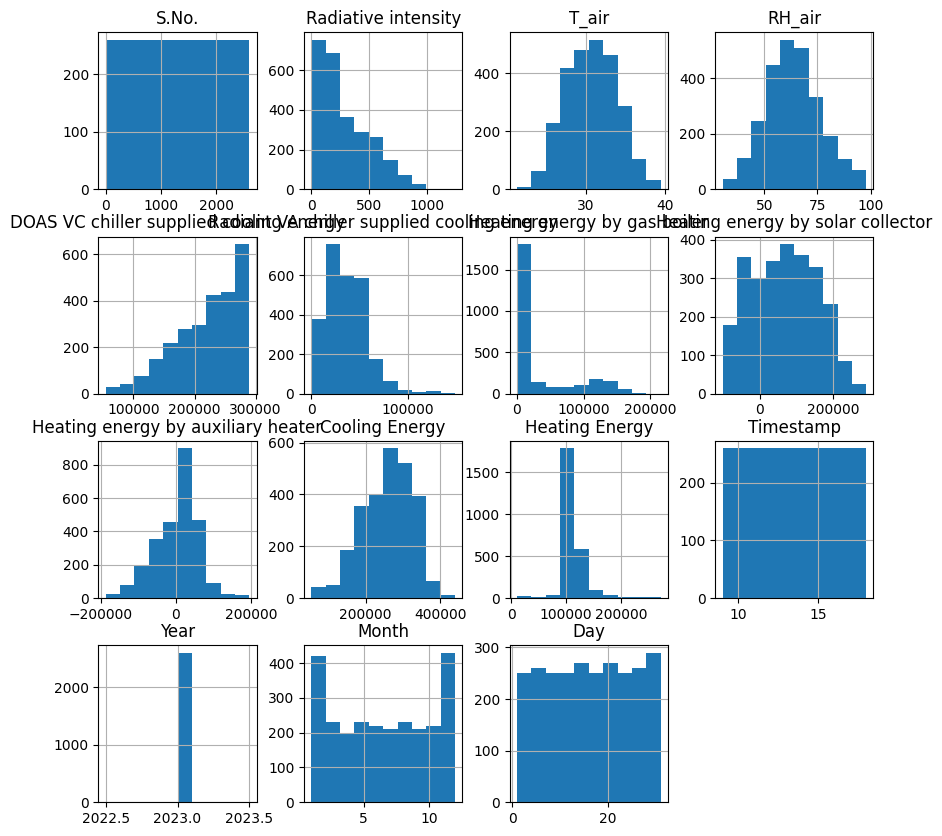

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame
# Replace 'data' with the name of your DataFrame if it's different
Data.hist(figsize=(10, 10))  # Adjust figsize as needed
plt.show()


In [ ]:
# import numpy as np
# import pandas as pd

# # Assuming 'data' is your DataFrame with skewed columns
# # Replace 'data' with the name of your DataFrame if it's different

# # List of columns to be transformed
# columns_to_transform = ['Heating Energy', 'Cooling Energy']

# # Apply logarithmic transformation to selected columns
# Data[columns_to_transform] = np.log1p(Data[columns_to_transform])

# # Plot histograms of transformed data
# Data.hist(figsize=(10, 10))
# plt.show()


In [ ]:
# import pandas as pd

# # Assuming 'Data' is your DataFrame
# # Replace 'Data' with the name of your DataFrame if it's different

# # Identify the column you want to filter
# column_to_filter = 'Cooling Energy'

# # Determine the range of values within 200-300
# lower_limit = 200000
# upper_limit = 300000

# # Filter the DataFrame to retain only values within the specified range
# filtered_data = Data[(Data[column_to_filter] >= lower_limit) & (Data[column_to_filter] <= upper_limit)]

# # Calculate the number of occurrences to retain (20% of total)
# num_to_retain = int(0.1 * len(filtered_data))

# # Sort the DataFrame by the column to be filtered
# sorted_data = filtered_data.sort_values(by=column_to_filter)

# # Remove 80% of occurrences of values outside the specified range
# final_data = pd.concat([sorted_data.head(num_to_retain), sorted_data.tail(num_to_retain)])

# # Alternatively, you can directly drop the values outside the range
# # final_data = Data[(Data[column_to_filter] >= lower_limit) & (Data[column_to_filter] <= upper_limit)]

# # Display the final DataFrame
# print(final_data)


In [ ]:
# import matplotlib.pyplot as plt
# import pandas as pd

# # Assuming 'data' is your DataFrame
# # Replace 'data' with the name of your DataFrame if it's different
# filtered_data.hist(figsize=(10, 10))  # Adjust figsize as needed
# plt.show()


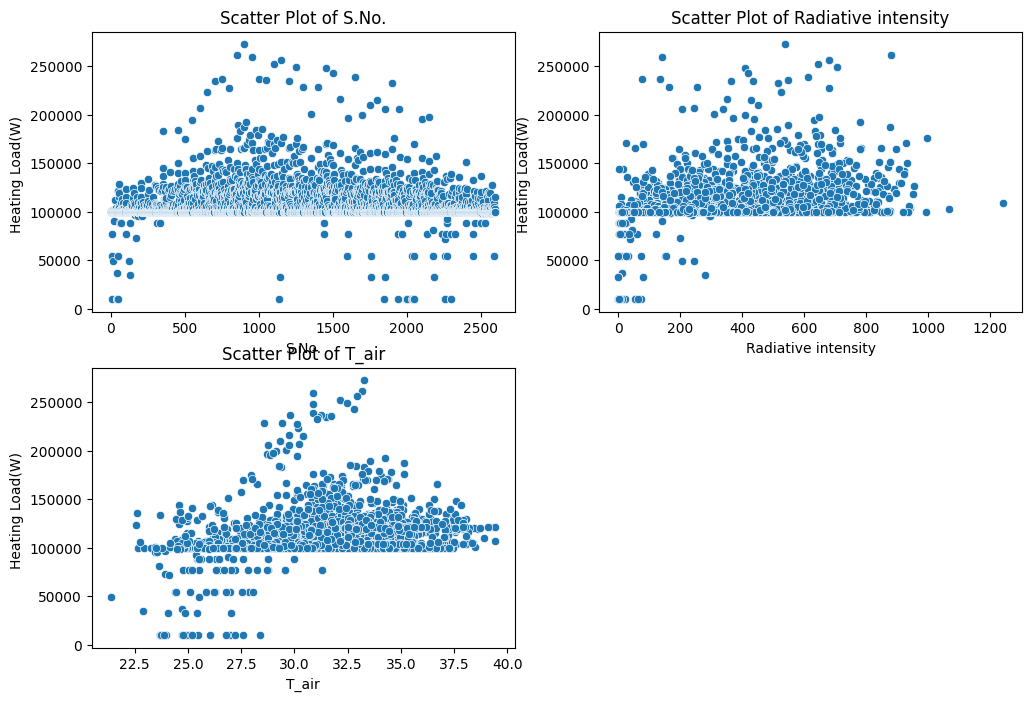

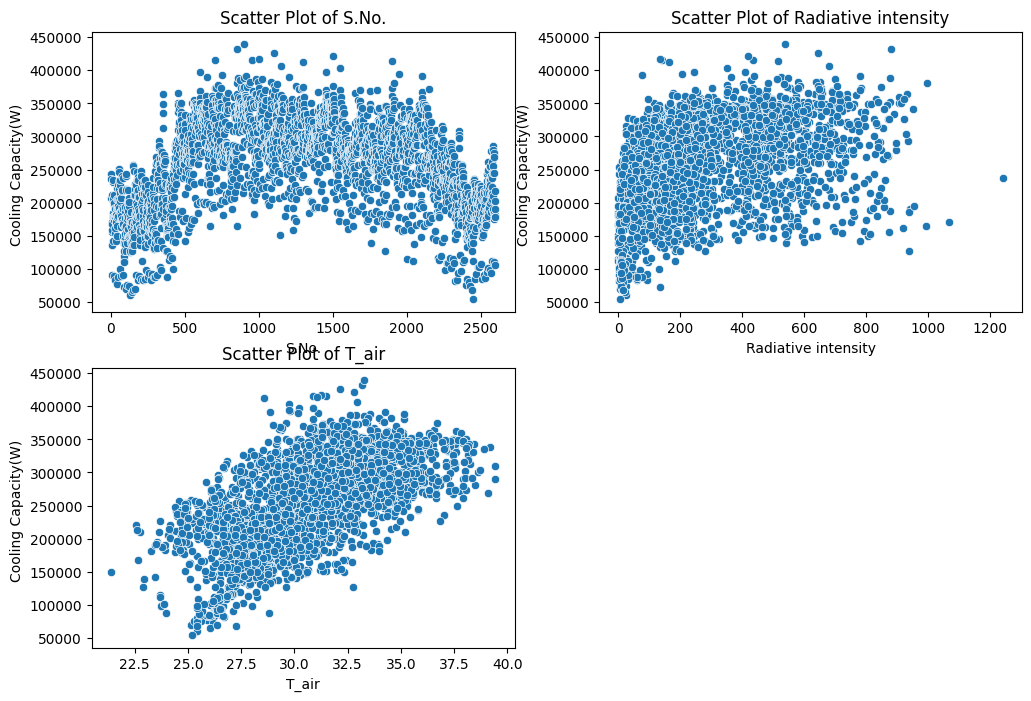

In [ ]:
Data

plt.figure(figsize=(12, 8))

for i, feature in enumerate(Data.columns[0:3]):
    plt.subplot(2, 2, i + 1)

    # Scatter Plot
    sns.scatterplot(x=feature, y='Heating Energy', data=Data)
    plt.title(f'Scatter Plot of {feature}')
    plt.ylabel('Heating Load(W) ')

plt.figure(figsize=(12, 8))

for i, feature in enumerate(Data.columns[0:3]):
    plt.subplot(2, 2, i + 1)

    # Scatter Plot
    sns.scatterplot(x=feature, y='Cooling Energy', data=Data)
    plt.title(f'Scatter Plot of {feature}')
    # plt.xlabel(f'T_air(°C) {feature} ')  # Replace 'Renamed' with your desired label
    plt.ylabel('Cooling Capacity(W) ')

Outliers in Radiative intensity:
      S.No.  Radiative intensity    T_air  RH_air  \
81       82            1241.7500  26.8625  75.875   
82       83             942.0625  28.2625  54.250   
142     143            1069.6880  30.0375  41.375   
304     305             955.3750  31.6000  47.875   
382     383             995.2500  30.7000  39.625   
851     852             996.5000  35.1250  59.250   
1223   1224             953.3750  37.0625  48.250   

      DOAS VC chiller supplied cooling energy  \
81                                   191825.1   
82                                   151632.9   
142                                  132611.4   
304                                  137997.9   
382                                  137217.8   
851                                  290021.9   
1223                                 290021.9   

      Radiant VA chiller supplied cooling energy  \
81                                      44726.93   
82                                      38881

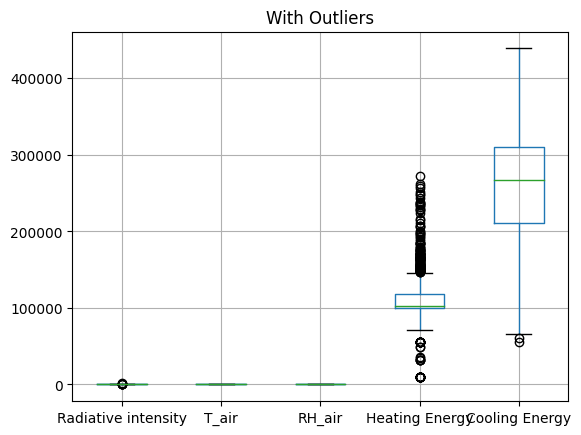

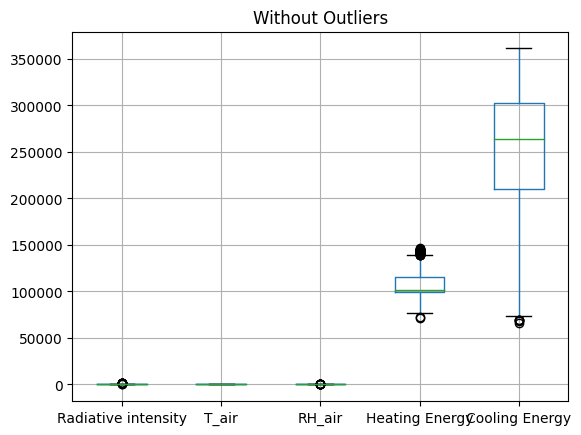

In [ ]:
# Function to detect outliers using IQR
# Data = Data.drop('Heating energy by gas boiler', axis = 1)

def detect_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# Specify the columns for which you want to detect outliers
columns_to_check = ['Radiative intensity', 'T_air', 'RH_air','Heating Energy', 'Cooling Energy']

# Detect outliers for each column
outliers_dict = {}
for column in columns_to_check:
    outliers_dict[column] = detect_outliers(Data[column])

# Display outliers
for column, outliers in outliers_dict.items():
    print(f"Outliers in {column}:")
    print(Data[outliers])

# Drop rows containing outliers
outliers_rows = outliers_dict[columns_to_check[0]]
for column in columns_to_check[1:]:
    outliers_rows |= outliers_dict[column]

cleaned_data = Data[~outliers_rows]

# Visualize the outliers using box plots
Data.boxplot(column=columns_to_check)
plt.title("With Outliers")
plt.show()

cleaned_data.boxplot(column=columns_to_check)
plt.title("Without Outliers")
plt.show()

In [ ]:
cleaned_data.shape
cleaned_data
cleaned_data.describe()

,S.No.,Radiative intensity,T_air,RH_air,DOAS VC chiller supplied cooling energy,Radiant VA chiller supplied cooling energy,Heating energy by gas boiler,Heating energy by solar collector,Heating energy by auxiliary heater,Cooling Energy,Heating Energy,Timestamp,Year,Month,Day
count,2421.000000,2421.000000,2421.000000,2421.000000,2421.000000,2421.000000,2421.000000,2421.000000,2421.000000,2421.000000,2421.000000,2421.000000,2421.0,2421.000000,2421.000000
mean,1303.619166,273.310461,30.794228,63.188145,220390.194919,34045.639945,30314.433004,68193.872781,-1116.267210,254435.834865,107391.038575,13.692689,2023.0,6.518794,15.821148
std,759.293580,212.304497,3.163788,12.775081,54035.892248,16725.989850,50659.214802,87621.055655,53180.959216,63416.273982,11765.481208,2.765293,0.0,3.478885,8.771751
min,1.000000,0.812500,22.562500,30.375000,60541.190000,321.318400,0.000000,-89294.700000,-187212.000000,65735.788000,71591.850000,9.000000,2023.0,1.000000,1.000000
25%,630.000000,108.687500,28.325000,54.375000,181774.100000,21415.940000,0.000000,-6894.680000,-36869.900000,209811.528000,99401.420000,11.000000,2023.0,3.000000,8.000000
50%,1316.000000,209.187500,30.775000,62.500000,230034.200000,32179.060000,0.000000,70619.510000,13444.020000,264174.100000,100923.510000,14.000000,2023.0,7.000000,16.000000
75%,1965.000000,419.625000,33.075000,71.250000,263700.400000,49163.800000,45323.480000,137820.600000,35609.800000,302962.440000,115342.070000,16.000000,2023.0,10.000000,23.000000
max,2600.000000,938.062500,39.437500,98.000000,290021.900000,71289.550000,215871.800000,278997.500000,111023.100000,361311.450000,146094.500000,18.000000,2023.0,12.000000,31.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
#'Year','Month','Day'
X = cleaned_data[['Timestamp','Year','Month','Day','Radiative intensity','T_air','RH_air']].values
# y_DOAS = np.array(cleaned_data[['DOAS VC chiller supplied cooling energy']].values)
# y_Rad =np.array(cleaned_data[['Radiant VA chiller supplied cooling energy']].values)
# y_solar = np.array(cleaned_data[['Heating energy by solar collector']].values)
# y_aux = np.array(cleaned_data[['Heating energy by auxiliary heater']].values)
# y_boil = np.array(cleaned_data[['Heating energy by gas boiler']].values)
# y_C = y_DOAS + y_Rad
# y_H = y_solar + y_aux + y_boil
y_C = cleaned_data['Cooling Energy']
y_H = cleaned_data['Heating Energy']

y_C = np.array(y_C).reshape(-1, 1)
y_H = np.array(y_H).reshape(-1, 1)

# Initialize the MinMaxScaler
scaler_x = MinMaxScaler()
scaler_y_C = MinMaxScaler()    # For Cooling Energy
scaler_y_H = MinMaxScaler()    # For Heating Energy


# scaler = StandardScaler()
X_Normalized = scaler_x.fit_transform(X)
Y_Normalized_C = scaler_y_C.fit_transform(y_C)
Y_Normalized_H = scaler_y_H.fit_transform(y_H)

# X_train, X_test, y_train_C, y_test_C = train_test_split(X_Normalized, Y_Normalized_C, test_size=0.2, random_state=42)
# X_train, X_test, y_train_H, y_test_H = train_test_split(X_Normalized, Y_Normalized_H, test_size=0.2, random_state=42)

# from sklearn.model_selection import train_test_split

# Generate indices for splitting
indices = range(len(X_Normalized))
indices_train, indices_test = train_test_split(indices, test_size=0.2, random_state=42)

# Split the data into training and testing sets
X_train_all, X_test_all = X_Normalized[indices_train], X_Normalized[indices_test]
y_train_C, y_test_C = Y_Normalized_C[indices_train], Y_Normalized_C[indices_test]

# Use the same indices to select subsets of the data for regression target
y_train_H, y_test_H = Y_Normalized_H[indices_train], Y_Normalized_H[indices_test]

# Ensure X_train and X_test are the same for both targets
X_train = X_train_all.copy()
X_test = X_test_all.copy()



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, initializers , regularizers
from tensorflow.keras.regularizers import l2 , l1
from tensorflow.keras.utils import plot_model

model = models.Sequential()

# Input layer
model.add(layers.Dense(16, activation='relu', input_shape=(7,)))

model.add(layers.Dense(32, activation='relu' ))
model.add(layers.Dense(64, activation='relu' ))
model.add(layers.Dense(128, activation='relu' ))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.4))

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))

# Output layer
model.add(layers.Dense(1, activation='linear'))


# Display the model summary
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (None, 16)                128       
                                                                 
 dense_66 (Dense)            (None, 32)                544       
                                                                 
 dense_67 (Dense)            (None, 64)                2112      
                                                                 
 dense_68 (Dense)            (None, 128)               8320      
                                                                 
 dense_69 (Dense)            (None, 256)               33024     
                                                                 
 dropout_15 (Dropout)        (None, 256)               0         
                                                                 
 dense_70 (Dense)            (None, 512)              

In [ ]:
import numpy as np
from keras import backend as K
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)

    # Avoid division by zero
    non_zero_mask = y_true != 0
    y_true, y_pred = y_true[non_zero_mask], y_pred[non_zero_mask]

    # Calculate MAPE
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    return mape

def r2_metric(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res / (SS_tot + K.epsilon()))

In [ ]:
# # Compile the model
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=custom_optimizer, loss='mse' , metrics=[r2_metric])

# Train the model
history = model.fit(X_train, y_train_C, epochs=200, batch_size=42, validation_data=(X_test, y_test_C), verbose =1)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
mae = mean_absolute_percentage_error(y_test_C, y_pred)
mse = mean_squared_error(y_test_C, y_pred)
r_squared = r2_score(y_test_C, y_pred)
print('For test Data with Output Cooling Energy')
print(f'Mean Absolute Percentage Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared: {r_squared}')

mae_train = mean_absolute_percentage_error(y_train_C, y_pred_train)
mse_train = mean_squared_error(y_train_C, y_pred_train)
r_squared_train = r2_score(y_train_C, y_pred_train)
print('For train Data with output Cooling Energy')
print(f'Mean Absolute Percentage Error (MAE): {mae_train}')
print(f'Mean Squared Error (MSE): {mse_train}')
print(f'R-squared: {r_squared_train}')
# Inverse transform predictions to original scale
y_pred_original_scale = scaler_y_C.inverse_transform(y_pred)
y_test_original_scale = scaler_y_C.inverse_transform(y_test_C)

# Calculate R-squared
print('\n')
print('For scaled data')
r_squared = r2_score(y_test_original_scale, y_pred_original_scale)
print(f'R-squared for original value(Scaled): {r_squared}')

mae_values = [mean_absolute_percentage_error(y_test_original_scale, y_pred_original_scale)]
mse_values = [mean_squared_error(y_test_original_scale, y_pred_original_scale) ]
r2_values = [r2_score(y_test_original_scale, y_pred_original_scale) ]

    # Display R-squared values for each output

print(f'R-squared for Output Dimension T: {r2_values}')

print(f'Mean Absolute Percentage Error (MAPE) T: {mae_values}')
print('\n')



Epoch 1/200
47/47 [==============================] - 4s 17ms/step - loss: 0.1162 - r2_metric: -1.7535 - val_loss: 0.0406 - val_r2_metric: 0.1405
Epoch 2/200
47/47 [==============================] - 1s 13ms/step - loss: 0.0358 - r2_metric: 0.1933 - val_loss: 0.0238 - val_r2_metric: 0.4928
Epoch 3/200
47/47 [==============================] - 1s 12ms/step - loss: 0.0152 - r2_metric: 0.5228 - val_loss: 0.0108 - val_r2_metric: 0.7644
Epoch 4/200
47/47 [==============================] - 1s 12ms/step - loss: 0.0094 - r2_metric: 0.7794 - val_loss: 0.0073 - val_r2_metric: 0.8413
Epoch 5/200
47/47 [==============================] - 1s 11ms/step - loss: 0.0080 - r2_metric: 0.8110 - val_loss: 0.0085 - val_r2_metric: 0.8125
Epoch 6/200
47/47 [==============================] - 1s 12ms/step - loss: 0.0075 - r2_metric: 0.8191 - val_loss: 0.0097 - val_r2_metric: 0.7858
Epoch 7/200
47/47 [==============================] - 1s 12ms/step - loss: 0.0067 - r2_metric: 0.8437 - val_loss: 0.0036 - val_r2_metric

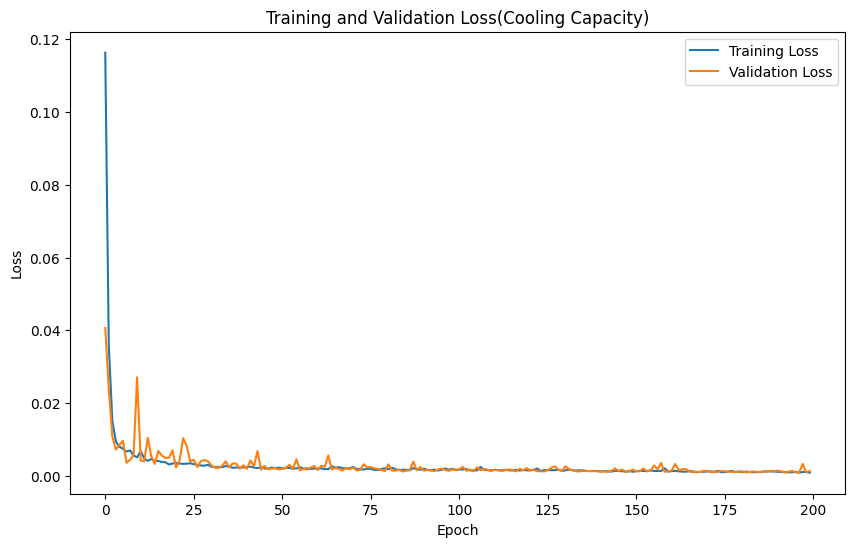

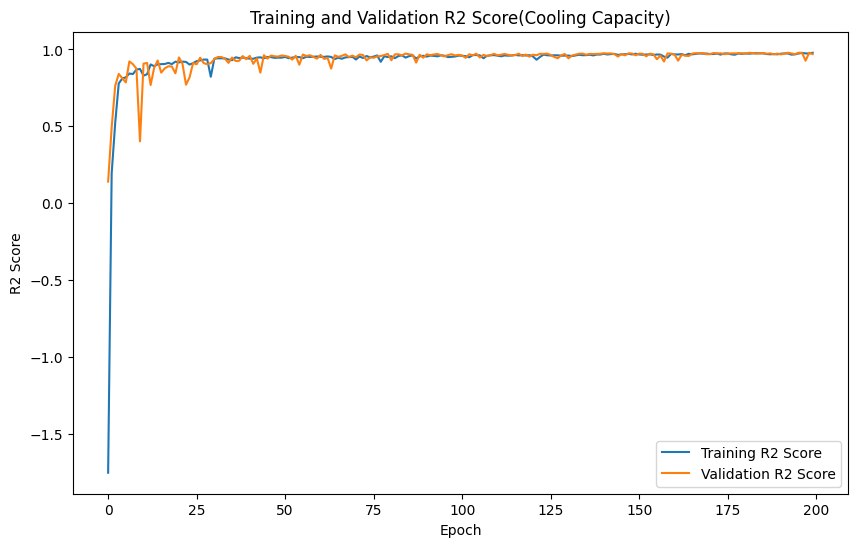

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss(Cooling Capacity)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['r2_metric'], label='Training R2 Score')
plt.plot(history.history['val_r2_metric'], label='Validation R2 Score')
plt.title('Training and Validation R2 Score(Cooling Capacity)')
plt.xlabel('Epoch')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

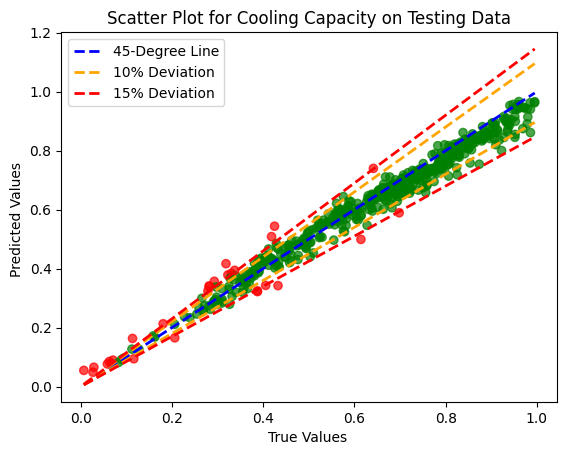

Number of data points within 15% deviation: 457/485
Number of data points within 10% deviation: 429/485


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming y_train and y_train_pred are your training true and predicted values
true_values_train = y_test_C.flatten()
predicted_values_train = y_pred.flatten()

# Calculate the absolute percentage error for training data
absolute_percentage_error_train = np.abs((predicted_values_train - true_values_train) / true_values_train) * 100

# Set tolerance thresholds (e.g., 2% and 5%)
tolerance_threshold_2 = 10
tolerance_threshold_5 = 15

# Color-code the points based on the percentage difference
colors_train = np.where(absolute_percentage_error_train <= tolerance_threshold_5, 'green', 'red')

# Create a scatter plot for training data
plt.scatter(true_values_train, predicted_values_train, color=colors_train, alpha=0.7)
plt.plot([min(true_values_train), max(true_values_train)], [min(true_values_train), max(true_values_train)], linestyle='--', color='blue', linewidth=2)
plt.plot([min(true_values_train), max(true_values_train)], [(1 - tolerance_threshold_2/100) * min(true_values_train), (1 - tolerance_threshold_2/100) * max(true_values_train)], linestyle='--', color='orange', linewidth=2)
plt.plot([min(true_values_train), max(true_values_train)], [(1 + tolerance_threshold_2/100) * min(true_values_train), (1 + tolerance_threshold_2/100) * max(true_values_train)], linestyle='--', color='orange', linewidth=2)
plt.plot([min(true_values_train), max(true_values_train)], [(1 - tolerance_threshold_5/100) * min(true_values_train), (1 - tolerance_threshold_5/100) * max(true_values_train)], linestyle='--', color='red', linewidth=2)
plt.plot([min(true_values_train), max(true_values_train)], [(1 + tolerance_threshold_5/100) * min(true_values_train), (1 + tolerance_threshold_5/100) * max(true_values_train)], linestyle='--', color='red', linewidth=2)

# Annotate the number of points within 5% deviation
num_within_5_percent = np.sum(absolute_percentage_error_train <= tolerance_threshold_5)
# plt.annotate(f'Within {tolerance_threshold_5}%: {num_within_5_percent}/{len(true_values_train)}',
            #  xy=(0.05, 0.85), xycoords='axes fraction', fontsize=10, color='black')

# Custom legend handles
legend_handles = [
    Line2D([0], [0], linestyle='--', color='blue', linewidth=2),
    Line2D([0], [0], linestyle='--', color='orange', linewidth=2),
    Line2D([0], [0], linestyle='--', color='red', linewidth=2)
]

plt.xlabel('True Values ')
plt.ylabel('Predicted Values ')
plt.title('Scatter Plot for Cooling Capacity on Testing Data')
plt.legend(legend_handles , ['45-Degree Line', f'10% Deviation', f'15% Deviation'], loc='upper left')
plt.show()

# Calculate the number of points within 5% deviation
num_within_5_percent = np.sum(absolute_percentage_error_train <= tolerance_threshold_5)

# Calculate the number of points within 2% deviation
num_within_2_percent = np.sum((absolute_percentage_error_train <= tolerance_threshold_2))

# Print the counts
print(f"Number of data points within 15% deviation: {num_within_5_percent}/{len(true_values_train)}")
print(f"Number of data points within 10% deviation: {num_within_2_percent}/{len(true_values_train)}")


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, initializers , regularizers
from tensorflow.keras.regularizers import l2 , l1
from tensorflow.keras.utils import plot_model

model1 = models.Sequential()

# Input layer
model1.add(layers.Dense(16, activation='relu', input_shape=(8,)))

model1.add(layers.Dense(32, activation='relu' ))
model1.add(layers.Dense(64, activation='relu' ))
model1.add(layers.Dense(128, activation='relu' ))
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dropout(0.3))

model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dropout(0.4))

model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dropout(0.3))

model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(32, activation='relu'))
model1.add(layers.Dense(16, activation='relu'))
model1.add(layers.Dense(8, activation='relu'))

# Output layer
model1.add(layers.Dense(1, activation='linear'))


# Display the model summary
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (None, 16)                128       
                                                                 
 dense_66 (Dense)            (None, 32)                544       
                                                                 
 dense_67 (Dense)            (None, 64)                2112      
                                                                 
 dense_68 (Dense)            (None, 128)               8320      
                                                                 
 dense_69 (Dense)            (None, 256)               33024     
                                                                 
 dropout_15 (Dropout)        (None, 256)               0         
                                                                 
 dense_70 (Dense)            (None, 512)              

In [ ]:
y_c_pred = model.predict(X_train)
y_c_pred = y_c_pred.reshape(-1, 1)
y_c_pred_test = model.predict(X_test)
y_c_pred_test = y_c_pred_test.reshape(-1, 1)

# Concatenate y_c_pred with X_train horizontally
X_train_combined = np.hstack((X_train, y_c_pred))
X_test_combined = np.hstack((X_test, y_c_pred_test))

16/16 [==============================] - 0s 5ms/step


Epoch 1/200
47/47 [==============================] - 3s 17ms/step - loss: 0.0422 - r2_metric: -0.7008 - val_loss: 0.0183 - val_r2_metric: 0.2436
Epoch 2/200
47/47 [==============================] - 1s 12ms/step - loss: 0.0165 - r2_metric: 0.3113 - val_loss: 0.0129 - val_r2_metric: 0.4714
Epoch 3/200
47/47 [==============================] - 1s 12ms/step - loss: 0.0156 - r2_metric: 0.1021 - val_loss: 0.0156 - val_r2_metric: 0.3545
Epoch 4/200
47/47 [==============================] - 1s 13ms/step - loss: 0.0142 - r2_metric: 0.4166 - val_loss: 0.0118 - val_r2_metric: 0.5154
Epoch 5/200
47/47 [==============================] - 1s 13ms/step - loss: 0.0143 - r2_metric: 0.4122 - val_loss: 0.0150 - val_r2_metric: 0.3870
Epoch 6/200
47/47 [==============================] - 1s 12ms/step - loss: 0.0145 - r2_metric: 0.4088 - val_loss: 0.0116 - val_r2_metric: 0.5249
Epoch 7/200
47/47 [==============================] - 1s 12ms/step - loss: 0.0144 - r2_metric: 0.2604 - val_loss: 0.0133 - val_r2_metric

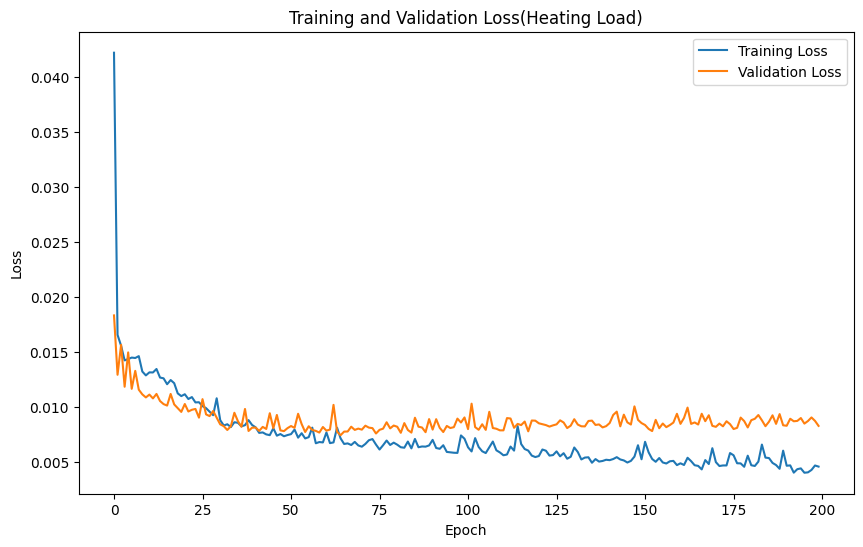

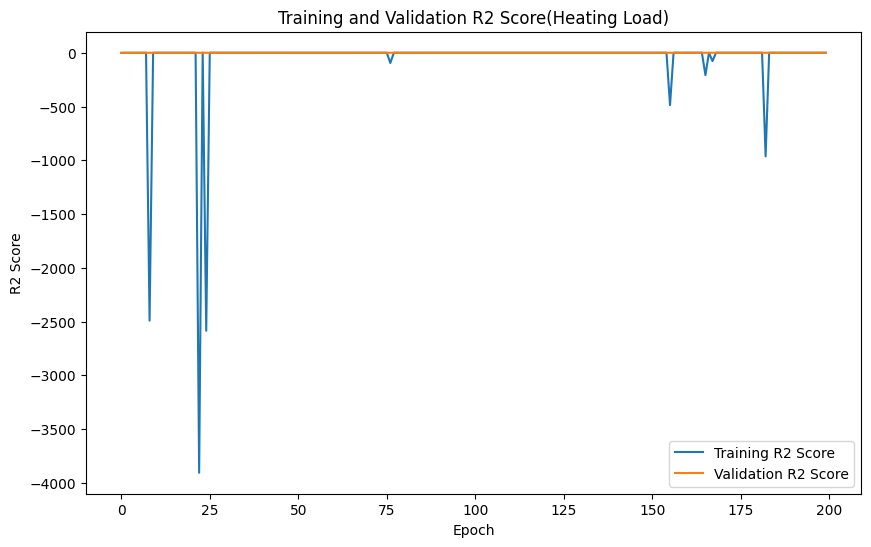

In [ ]:
# # Compile the model
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model1.compile(optimizer=custom_optimizer, loss='mse' , metrics=[r2_metric])

# Train the model
history = model1.fit(X_train_combined, y_train_H, epochs=200, batch_size=42, validation_data=(X_test_combined, y_test_H), verbose =1)
y_pred = model1.predict(X_test_combined)
y_pred_train = model1.predict(X_train_combined)
mae = mean_absolute_percentage_error(y_test_H, y_pred)

mse = mean_squared_error(y_test_H, y_pred)
r_squared = r2_score(y_test_H, y_pred)
print('For test Data with Output Heating Energy')
print(f'Mean Absolute Percentage Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared: {r_squared}')


mae_train = mean_absolute_percentage_error(y_train_H, y_pred_train)
mse_train = mean_squared_error(y_train_H, y_pred_train)
r_squared_train = r2_score(y_train_H, y_pred_train)
print('For train Data with output Heating Energy')
print(f'Mean Absolute Percentage Error (MAE): {mae_train}')
print(f'Mean Squared Error (MSE): {mse_train}')
print(f'R-squared: {r_squared_train}')
# Inverse transform predictions to original scale
y_pred_original_scale = scaler_y_H.inverse_transform(y_pred)
y_test_original_scale = scaler_y_H.inverse_transform(y_test_H)

# Calculate R-squared
print('\n')
print('For scaled data')
r_squared = r2_score(y_test_original_scale, y_pred_original_scale)
print(f'R-squared for original value(Scaled): {r_squared}')

mae_values = [mean_absolute_percentage_error(y_test_original_scale, y_pred_original_scale)]
mse_values = [mean_squared_error(y_test_original_scale, y_pred_original_scale) ]
r2_values = [r2_score(y_test_original_scale, y_pred_original_scale) ]

    # Display R-squared values for each output

print(f'R-squared for Output Dimension T: {r2_values}')

print(f'Mean Absolute Percentage Error (MAPE) T: {mae_values}')
print('\n')

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss(Heating Load)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['r2_metric'], label='Training R2 Score')
plt.plot(history.history['val_r2_metric'], label='Validation R2 Score')
plt.title('Training and Validation R2 Score(Heating Load)')
plt.xlabel('Epoch')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

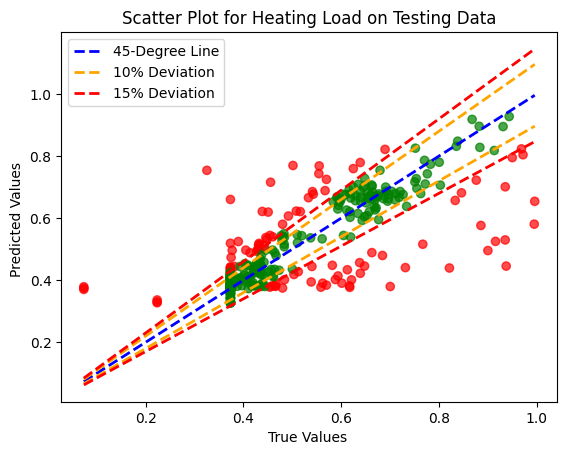

Number of data points within 15% deviation: 390/485
Number of data points within 10% deviation: 334/485


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming y_train and y_train_pred are your training true and predicted values
true_values_train = y_test_H.flatten()
predicted_values_train = y_pred.flatten()

# Calculate the absolute percentage error for training data
absolute_percentage_error_train = np.abs((predicted_values_train - true_values_train) / true_values_train) * 100

# Set tolerance thresholds (e.g., 2% and 5%)
tolerance_threshold_2 = 10
tolerance_threshold_5 = 15

# Color-code the points based on the percentage difference
colors_train = np.where(absolute_percentage_error_train <= tolerance_threshold_5, 'green', 'red')

# Create a scatter plot for training data
plt.scatter(true_values_train, predicted_values_train, color=colors_train, alpha=0.7)
plt.plot([min(true_values_train), max(true_values_train)], [min(true_values_train), max(true_values_train)], linestyle='--', color='blue', linewidth=2)
plt.plot([min(true_values_train), max(true_values_train)], [(1 - tolerance_threshold_2/100) * min(true_values_train), (1 - tolerance_threshold_2/100) * max(true_values_train)], linestyle='--', color='orange', linewidth=2)
plt.plot([min(true_values_train), max(true_values_train)], [(1 + tolerance_threshold_2/100) * min(true_values_train), (1 + tolerance_threshold_2/100) * max(true_values_train)], linestyle='--', color='orange', linewidth=2)
plt.plot([min(true_values_train), max(true_values_train)], [(1 - tolerance_threshold_5/100) * min(true_values_train), (1 - tolerance_threshold_5/100) * max(true_values_train)], linestyle='--', color='red', linewidth=2)
plt.plot([min(true_values_train), max(true_values_train)], [(1 + tolerance_threshold_5/100) * min(true_values_train), (1 + tolerance_threshold_5/100) * max(true_values_train)], linestyle='--', color='red', linewidth=2)

# Annotate the number of points within 5% deviation
num_within_5_percent = np.sum(absolute_percentage_error_train <= tolerance_threshold_5)
# plt.annotate(f'Within {tolerance_threshold_5}%: {num_within_5_percent}/{len(true_values_train)}',
#              xy=(0.05, 0.85), xycoords='axes fraction', fontsize=10, color='black')

# Custom legend handles
legend_handles = [
    Line2D([0], [0], linestyle='--', color='blue', linewidth=2),
    Line2D([0], [0], linestyle='--', color='orange', linewidth=2),
    Line2D([0], [0], linestyle='--', color='red', linewidth=2)
]

plt.xlabel('True Values ')
plt.ylabel('Predicted Values ')
plt.title('Scatter Plot for Heating Load on Testing Data')
plt.legend(legend_handles , ['45-Degree Line', f'10% Deviation', f'15% Deviation'], loc='upper left')
plt.show()

# Calculate the number of points within 5% deviation
num_within_5_percent = np.sum(absolute_percentage_error_train <= tolerance_threshold_5)

# Calculate the number of points within 2% deviation
num_within_2_percent = np.sum((absolute_percentage_error_train <= tolerance_threshold_2))

# Print the counts
print(f"Number of data points within 15% deviation: {num_within_5_percent}/{len(true_values_train)}")
print(f"Number of data points within 10% deviation: {num_within_2_percent}/{len(true_values_train)}")


In [ ]:
from keras.models import model_from_json

# Save the model architecture as JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Save the model weights to HDF5 format
model.save_weights("model.h5")

print("Model saved successfully.")

Model saved successfully.
